<a href="https://colab.research.google.com/github/vikas0183/soiltest/blob/main/genefarmsoil4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
le_results=LabelEncoder()
df['label']=le_results.fit_transform(df['label'])

In [ ]:
categorical_columns = ['N',	'P','K','temperature',	'humidity'	,'ph','rainfall'	]

In [ ]:
for col in categorical_columns:
  df[col]=LabelEncoder().fit_transform(df[col])

In [ ]:
X=df.iloc[:,1:-1]
y=df['label']
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.990909090909091

In [ ]:
class_report=classification_report(y_test,y_pred,target_names=le_results.classes_)
print('classification_report')
print(class_report)

classification_report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
     

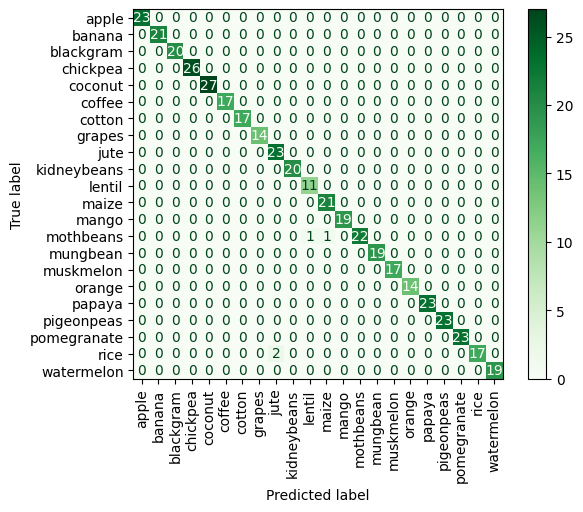

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le_results.classes_)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)
plt.show()

In [ ]:
joblib.dump(le_results,'label_encoder_results.joblib')
joblib.dump(model,'crop.joblib')

['crop.joblib']